## Face Identification


### Tasks
- Feature reduction
- Classification

### Dataset

Labeled Faces of the Web: http://vis-www.cs.umass.edu/lfw/

![image](http://vis-www.cs.umass.edu/lfw/Six_Face_Panels_sm.jpg)

A subset of this dataset is included in Scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
# From anaconda: install pillow
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [2]:
n_samples, height, width = lfw.images.shape
print('number of images', n_samples)
print('height (pixels)', height)
print('width (pixels)', width)

number of images 1288
height (pixels) 50
width (pixels) 37


In [3]:
print('labels', lfw.target_names)

print('y', lfw.target.shape, lfw.target)

print('X', lfw.data.shape, lfw.data)

labels ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
y (1288,) [5 6 3 ... 5 3 5]
X (1288, 1850) [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


## Data exploration

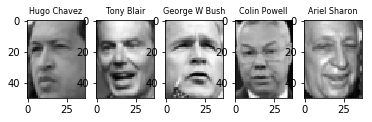

In [4]:
%matplotlib inline
# plot images to see dataset

import matplotlib.pyplot as plt
num = 5

images = lfw.data[:5] # first 5 images (X)
targets = lfw.target[:5] # first 5 targets (y)

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

# for i in range(num):
#   axes[i].imshow(images[i])
#

for image, target, ax in zip(images, targets, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)
    ax.set_title(lfw.target_names[target], size=8)

plt.show()

In [7]:
X = lfw.data
y = lfw.target

Before (1288, 1850)
After (1288, 2)


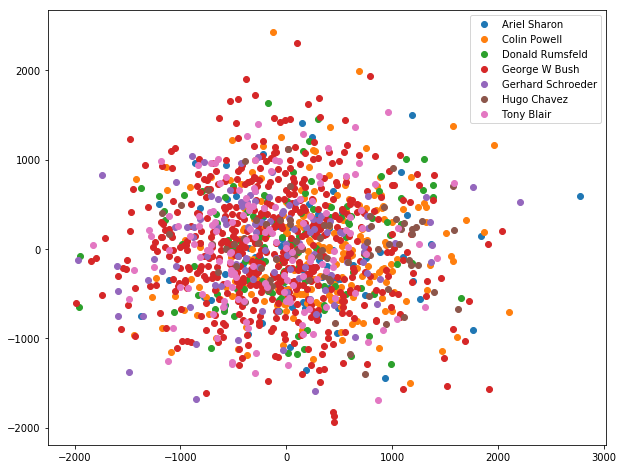

In [12]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

from sklearn.decomposition import PCA

pca_plot = PCA(n_components=2) # Z will have 2 components

Z_2d = pca_plot.fit_transform(X)

print('Before', X.shape)
print('After', Z_2d.shape)

# plot
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(lfw.target_names)):
    indices = (y == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_2d[indices, 0], Z_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

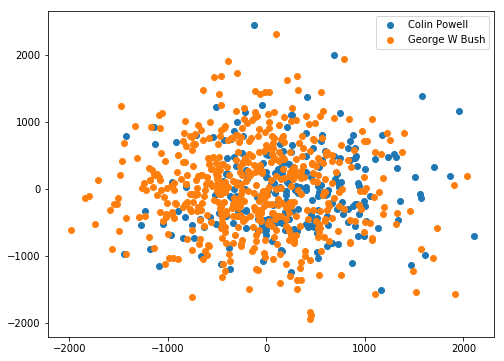

In [13]:
%matplotlib inline
# plot
fig, ax = plt.subplots(figsize=(8, 6))

# to compare any classes, just select the labels
#for i in range(len(lfw.target_names)):
for i in [1, 3]:
    indices = (y == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_2d[indices, 0], Z_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

Z_2d = tsne.fit_transform(X)

print('Before', X.shape)
print('After', Z_2d.shape)

Before (1288, 1850)
After (1288, 2)


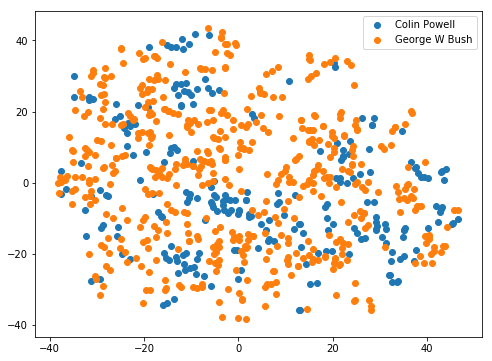

In [15]:
%matplotlib inline
# plot
fig, ax = plt.subplots(figsize=(8, 6))

# to compare any classes, just select the labels
#for i in range(len(lfw.target_names)):
for i in [1, 3]:
    indices = (y == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_2d[indices, 0], Z_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

## Feature reduction

In [16]:
# PCA to map X to Z for training
from sklearn.model_selection import train_test_split

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit using training set
pca = PCA(n_components=150)
pca.fit(X_train) # compute eigenvectors / eigenvalues

eigenfaces = pca.components_
eigenfaces
# transform train and test

array([[-0.00685207, -0.00752691, -0.00918905, ..., -0.01433786,
        -0.01294191, -0.01188293],
       [ 0.02304092,  0.0215521 ,  0.02275388, ..., -0.04400196,
        -0.04318587, -0.0422613 ],
       [ 0.0218785 ,  0.02016278,  0.0190091 , ...,  0.05723392,
         0.05080701,  0.04725143],
       ...,
       [-0.05833287, -0.03553748, -0.02084466, ..., -0.04843947,
        -0.05478575, -0.02217745],
       [ 0.01278656,  0.02012853,  0.00071485, ..., -0.06475701,
        -0.00222767,  0.08257438],
       [ 0.00495718,  0.02354143,  0.05040548, ..., -0.03116857,
        -0.03712672,  0.0169892 ]], dtype=float32)

In [17]:
eigenfaces.shape

(150, 1850)

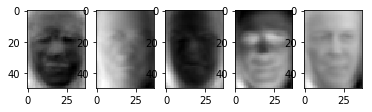

In [18]:
# plot the faces (eigenvectors)
eigenfaces = pca.components_

num = 5

# note: last 5, do eigenfaces[-num:]
images = eigenfaces[:num] # first 5 eigenvectors

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)

plt.show()

In [19]:
print(pca.explained_variance_)

[501418.1     391794.06    183593.1     154257.47    133670.7
  74828.52     65169.754    56409.035    52337.836    49298.79
  43599.164    40965.586    31706.814    28196.91     27588.168
  25390.41     23128.988    22155.635    21659.762    18729.104
  18053.53     16946.488    16575.908    14548.066    13765.097
  13481.166    13152.365    12549.609    11496.802    10829.21
  10203.934     9893.544     9228.299     9102.341     8670.932
   8551.057     8154.3916    7677.286     7519.664     7379.3735
   7257.0786    6934.437     6736.051     6697.16      6244.0776
   6194.193     6101.1255    5768.958     5637.3086    5612.9077
   5418.4746    5324.1797    5194.477     5116.046     5023.6475
   4892.295     4669.669     4636.62      4530.9204    4485.164
   4293.1885    4223.2314    4079.6985    3976.535     3886.7585
   3816.7058    3730.3684    3677.256     3620.6382    3580.4502
   3473.1167    3451.4226    3338.511     3255.1384    3220.2188
   3158.4253    3134.6772    3066.165

In [20]:
print(pca.explained_variance_ratio_)

[0.19346513 0.15116824 0.07083682 0.05951808 0.05157496 0.02887153
 0.02514483 0.02176463 0.02019382 0.01902125 0.01682213 0.015806
 0.01223363 0.01087938 0.01064451 0.00979653 0.008924   0.00854844
 0.00835712 0.00722636 0.0069657  0.00653856 0.00639558 0.00561317
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.0041783
 0.00393704 0.00381728 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200422 0.00197395
 0.0019383  0.00188762 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134005 0.00133168
 0.00128812 0.00125595 0.00124248 0.00121863 0.00120947 0.00118304
 0.00115089 0.00113676 0.00112626 0.00111619 0.001094   0.00107179
 0.0010567  0.00104363 0.00102396 0.00101697 0.00099772 0.0009637

In [21]:
# eigenvalues-equivalent (explained_variance)
# print(pca.explained_variance_)

import numpy as np
# 95.7% of the variance is captured by projecting from 1850 to 150 features 
print(np.sum(pca.explained_variance_ratio_))

0.9567448


50 : 0.86301905
100 : 0.9283381
150 : 0.9566723
200 : 0.97219235
250 : 0.9814999


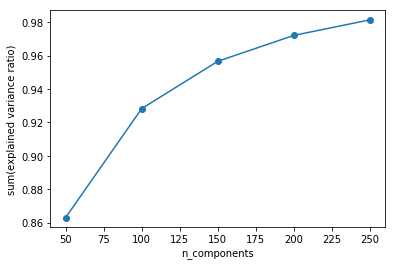

In [22]:
components = range(50, 300, 50)
evrs = []

for n in components:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train) # notice that PCA is unsupervised

    # compute sum of ratios (e.g. 0.95, etc)
    evr = np.sum(pca_temp.explained_variance_ratio_)
    evrs.append(evr)
    print(n, ':', evr)
    
fig, ax = plt.subplots()
ax.plot(components, evrs, marker='o')
ax.set(xlabel='n_components', ylabel='sum(explained variance ratio)')
plt.show()

In [23]:
# plot the transformed "images"
Z_train = pca.transform(X_train) # Z_train = e . X_train'
Z_test = pca.transform(X_test)

print('Train set after PCA', Z_train.shape)
print('Test set after PCA', Z_test.shape)

Train set after PCA (966, 150)
Test set after PCA (322, 150)


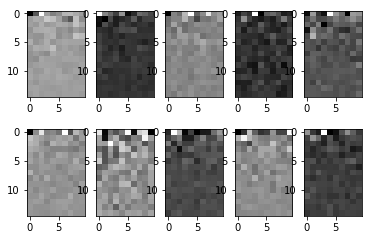

In [24]:
nrows=2
ncols=5

num = nrows * ncols
z_height = 15 # arbitrary (just for plotting)
z_width = 10

images = Z_train[:num] # first 5 transformed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(z_height, z_width), cmap=plt.cm.gray) 
plt.show()

## Training

1. SGD + Logistic Regression
2. SVM with some non-linear kernel
3. Compare evaluation metrics

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train, y_train)

# using test set like validation set
scores = sgd_clf.score(Z_test, y_test)
print(scores) # accuracy

-- Epoch 1
Norm: 53786.00, NNZs: 150, Bias: -2986.647776, T: 966, Avg. loss: 3648575.934529
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39865.97, NNZs: 150, Bias: -4758.267429, T: 1932, Avg. loss: 2297486.089167
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33981.77, NNZs: 150, Bias: -6019.225402, T: 2898, Avg. loss: 1592446.479325
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 28550.81, NNZs: 150, Bias: -6953.063599, T: 3864, Avg. loss: 1222547.575533
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 25260.70, NNZs: 150, Bias: -7779.919350, T: 4830, Avg. loss: 1089543.024612
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 60484.59, NNZs: 150, Bias: -2177.138231, T: 966, Avg. loss: 2680893.636053
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 55359.07, NNZs: 150, Bias: -3392.707002, T: 1932, Avg. loss: 1459486.529393
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 46620.91, NNZs: 150, Bias: -4196.510309, T: 2898, Avg. loss: 1056838.772182
Total trainin

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


In [26]:
from sklearn.svm import SVC

svc = SVC() # TODO: GridSearchCV is best
svc.fit(Z_train, y_train)

scores = svc.score(Z_test, y_test)
print(scores) # accuracy

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.453416149068323


In [27]:
y_pred_svc = svc.predict(Z_test)
y_pred_sgd = sgd_clf.predict(Z_test)

print('Actual (ground truth)', y_test[:10])
print('---')
print('prediction SVC', y_pred_svc[:10])
print('prediction Logistic Regression', y_pred_sgd[:10])

Actual (ground truth) [3 3 6 3 3 3 4 1 3 3]
---
prediction SVC [3 3 3 3 3 3 3 3 3 3]
prediction Logistic Regression [3 1 6 3 3 3 4 1 3 2]


In [28]:
from sklearn.metrics import confusion_matrix

print('SVC\n', confusion_matrix(y_test, y_pred_svc))

print('Logistic Regression\n', confusion_matrix(y_test, y_pred_sgd))

SVC
 [[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]
Logistic Regression
 [[ 6  3  1  3  0  0  0]
 [ 3 47  3  3  0  3  1]
 [ 2  2 17  5  0  0  1]
 [ 7  6 13 96  8 10  6]
 [ 0  3  1  0 17  4  0]
 [ 1  2  0  1  2  9  0]
 [ 0  1  3  4  7  2 19]]


Text(33,0.5,'Actual')

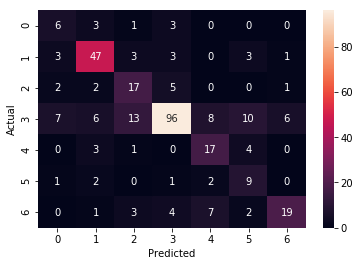

In [29]:
%matplotlib inline
import seaborn as sns

cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

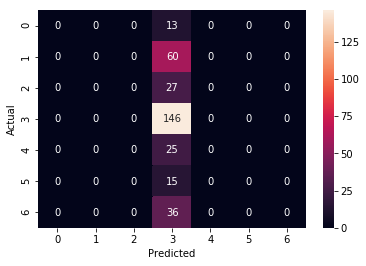

In [30]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d') # fmt='d' prints integers
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [31]:
# precision / recall
from sklearn.metrics import classification_report

# usage: classification_report(y_true, y_pred)
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.32      0.46      0.37        13
           1       0.73      0.78      0.76        60
           2       0.45      0.63      0.52        27
           3       0.86      0.66      0.74       146
           4       0.50      0.68      0.58        25
           5       0.32      0.60      0.42        15
           6       0.70      0.53      0.60        36

   micro avg       0.66      0.66      0.66       322
   macro avg       0.55      0.62      0.57       322
weighted avg       0.71      0.66      0.67       322

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        27
           3       0.45      1.00      0.62       146
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        15
           6       0.00 

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# Improvements:
# 1. Scale
# 3. Balance the classes
# 3. Tune algorithms. SVC and Logistic Regression

In [33]:
# 1. Scale

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


-- Epoch 1
Norm: 392.51, NNZs: 150, Bias: -625.848802, T: 966, Avg. loss: 35.875134
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 372.91, NNZs: 150, Bias: -583.139735, T: 1932, Avg. loss: 7.570252
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 320.33, NNZs: 150, Bias: -570.281389, T: 2898, Avg. loss: 2.311329
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 298.06, NNZs: 150, Bias: -551.558569, T: 3864, Avg. loss: 0.752553
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 276.01, NNZs: 150, Bias: -539.947226, T: 4830, Avg. loss: 0.562723
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 559.26, NNZs: 150, Bias: -481.685024, T: 966, Avg. loss: 54.044365
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 508.43, NNZs: 150, Bias: -446.747560, T: 1932, Avg. loss: 18.523982
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 423.87, NNZs: 150, Bias: -449.741632, T: 2898, Avg. loss: 11.490778
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 401.86, NNZs: 150, Bias: -395

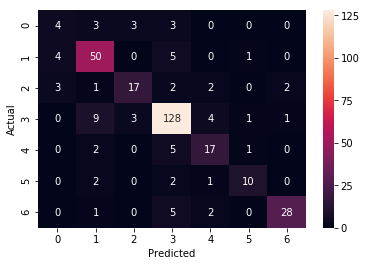

In [35]:
# fit our classifiers

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train_scaled, y_train)

scores = sgd_clf.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_sgd = sgd_clf.predict(Z_test_scaled)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_sgd))

0.8105590062111802
              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.84      0.87      0.85        60
           2       1.00      0.48      0.65        27
           3       0.74      0.98      0.84       146
           4       1.00      0.72      0.84        25
           5       1.00      0.40      0.57        15
           6       1.00      0.67      0.80        36

   micro avg       0.81      0.81      0.81       322
   macro avg       0.94      0.64      0.73       322
weighted avg       0.85      0.81      0.80       322



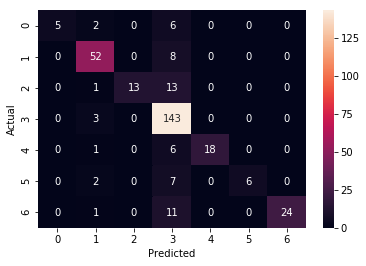

In [36]:
svc = SVC()
svc.fit(Z_train_scaled, y_train)

scores = svc.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_svc = svc.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

In [37]:
# 2. Balance the classes

3    384
1    176
6    108
2     94
4     84
0     64
5     56
Name: labels, dtype: int64


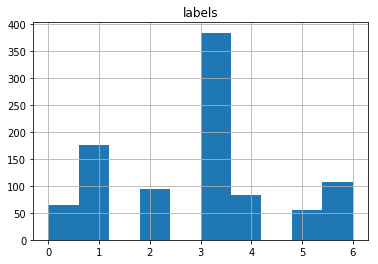

In [38]:
import pandas as pd
df_y = pd.DataFrame(y_train, columns=['labels'])
df_y.hist() # plot a histogram to see distribution

# count how many rows per label using value_counts()
print(df_y['labels'].value_counts())

In [39]:
# first, combine all training set (y, Z_train) in 1 dataframe
# this way, the values and labels are lined up
df_train = pd.concat([df_y, pd.DataFrame(Z_train)], axis=1) # concat columns

df_train.head()

,labels,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,3,-1469.753540,-654.596619,911.343933,14.460114,-276.975708,-141.524643,218.395370,249.842285,104.718460,...,-15.057944,59.796272,-33.580383,2.692898,7.139274,-30.554462,15.833963,7.342413,13.664001,-29.383724
1,1,935.490112,371.076050,228.873505,48.177422,432.500824,-184.197601,-46.488548,252.799347,199.048462,...,-6.943935,1.571501,-31.210064,-16.523970,18.450968,0.034257,-2.474800,13.743936,-18.258528,11.354603
2,2,-539.006958,-12.349236,-102.794388,196.025360,476.893677,-153.463409,17.803871,384.975128,27.223774,...,-16.059359,-62.172710,40.267120,-5.980263,40.383572,-11.577291,5.566020,-25.024527,-11.883816,9.574930
3,6,-83.137299,72.949898,-4.174137,826.381042,-201.027878,170.537292,226.074203,117.869438,-79.156746,...,7.719523,-44.231499,-23.699688,12.082955,45.050419,21.369148,33.294868,-97.405235,-78.409302,15.431274
4,4,-280.672333,267.177429,-107.541107,-255.999298,656.290894,251.065674,89.126816,-330.384979,268.815796,...,13.480834,18.911972,7.643690,-9.167043,-9.590395,-24.005287,11.134974,-33.959579,-12.730395,75.828926


3    100
Name: labels, dtype: int64
1    100
Name: labels, dtype: int64
6    108
2     94
4     84
0     64
5     56
Name: labels, dtype: int64
6    108
3    100
1    100
2     94
4     84
0     64
5     56
Name: labels, dtype: int64


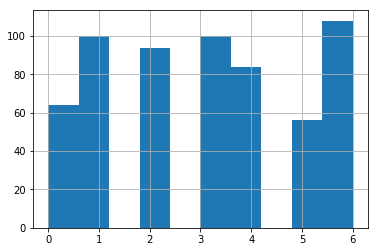

In [40]:
# next, randomly select 100 rows for labels 1 and 3
df_3 = df_train.loc[df_train['labels'] == 3].sample(n=100, random_state=42)
print(df_3['labels'].value_counts())

df_1 = df_train.loc[df_train['labels'] == 1].sample(n=100, random_state=42)
print(df_1['labels'].value_counts())

# get the remaining labels
df_others = df_train.loc[(df_train['labels'] != 3) & (df_train['labels'] != 1)]
print(df_others['labels'].value_counts())

# combine all labels into the balanced dataset
df_balanced = pd.concat([df_others, df_1, df_3])
print(df_balanced['labels'].value_counts())

# shuffle the dataset because we joined groups of the same labels together
df_balanced = df_balanced.sample(frac=1, random_state=42)
df_balanced['labels'].hist()

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-- Epoch 1
Norm: 516.84, NNZs: 150, Bias: -567.294234, T: 606, Avg. loss: 56.519476
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 443.91, NNZs: 150, Bias: -604.918097, T: 1212, Avg. loss: 13.313661
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 402.55, NNZs: 150, Bias: -585.086272, T: 1818, Avg. loss: 4.016121
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 363.77, NNZs: 150, Bias: -575.240377, T: 2424, Avg. loss: 1.354337
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 349.22, NNZs: 150, Bias: -556.569088, T: 3030, Avg. loss: 0.755451
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 580.72, NNZs: 150, Bias: -469.442333, T: 606, Avg. loss: 64.214816
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 512.19, NNZs: 150, Bias: -489.400878, T: 1212, Avg. loss: 12.703015
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 465.92, NNZs: 150, Bias: -465.778647, T: 1818, Avg. loss: 7.704365
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 411.84, NNZs: 150, Bias: -450

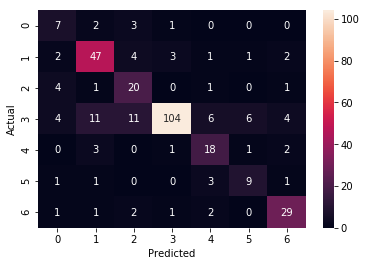

In [41]:
# fit our classifiers

Z_train_balanced = df_balanced.loc[:, df_balanced.columns != 'labels']
y_train_balanced = df_balanced['labels']

scaler = StandardScaler()
Z_train_balanced_scaled = scaler.fit_transform(Z_train_balanced)
Z_test_scaled = scaler.transform(Z_test)

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train_balanced_scaled, y_train_balanced)

scores = sgd_clf.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_sgd = sgd_clf.predict(Z_test_scaled)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_sgd))

0.8260869565217391
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.73      0.90      0.81        60
           2       0.83      0.74      0.78        27
           3       0.97      0.82      0.89       146
           4       0.74      0.80      0.77        25
           5       0.92      0.73      0.81        15
           6       0.69      0.86      0.77        36

   micro avg       0.83      0.83      0.83       322
   macro avg       0.79      0.80      0.79       322
weighted avg       0.85      0.83      0.83       322



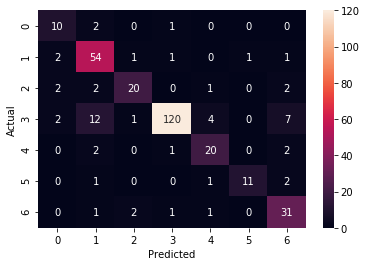

In [42]:
svc = SVC()
svc.fit(Z_train_balanced_scaled, y_train_balanced)

scores = svc.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_svc = svc.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

## Tuning

In [43]:
# Tune SVC hyperparameters

# http://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use
# https://cs.stanford.edu/people/karpathy/svmjs/demo/
# https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
    
from sklearn.model_selection import GridSearchCV

# SVC(C=1.0, kernel='rbf', degree=3, gamma='auto'...)

# Error penalty
# smaller = more sensitive to noise
Cs = [.001, .01, .1, 1., 10.] 

# Sensitivity: RBF(x, z) = exp(−gamma * ‖x − z‖^2)
# larger = higher tendency to overfit
gammas = [.001, .01, .1, 1, 10.]

# 3-fold cross validation
gs = GridSearchCV(SVC(probability=True), param_grid={'C': Cs, 'gamma': gammas}, verbose=True)

# try the unbalanced (but scaled) dataset
gs.fit(Z_train_scaled, y_train)

print(gs.score(Z_test_scaled, y_test))
print(gs.best_params_)

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   53.2s finished


0.8136645962732919
{'C': 10.0, 'gamma': 0.001}


              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.78      0.77      0.77        60
           2       0.76      0.70      0.73        27
           3       0.81      0.95      0.87       146
           4       1.00      0.68      0.81        25
           5       0.80      0.53      0.64        15
           6       1.00      0.72      0.84        36

   micro avg       0.81      0.81      0.81       322
   macro avg       0.81      0.70      0.74       322
weighted avg       0.82      0.81      0.81       322



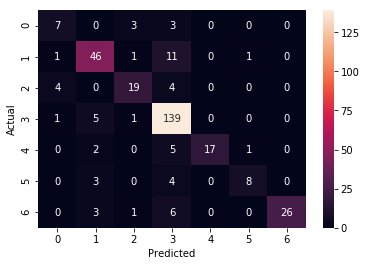

In [44]:
y_pred_svc = gs.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

## Deployment and Predictions

Inventory (what's needed for prediction):
1. PCA: use for feature reduction
2. Feature Scaler: use for scaling inputs before passing to model
3. Model

In [48]:
# save model for later use
import pickle

pickle.dump(pca, open('02_faces_pca.pickle', 'wb'))
pickle.dump(scaler, open('02_faces_Z_scaler.pickle', 'wb'))
pickle.dump(gs.best_estimator_, open('02_faces_model.pickle', 'wb'))

In [49]:
def load_model():
    pca1 = pickle.load(open('02_faces_pca.pickle', 'rb'))
    scaler1 = pickle.load(open('02_faces_Z_scaler.pickle', 'rb'))
    model1 = pickle.load(open('02_faces_model.pickle', 'rb'))    
    return pca1, scaler1, model1

In [50]:
def get_predictions(pca, scaler, model, images):
    # PCA transform to 150 features
    Z_images = pca.transform(images)

    # scale
    Z_images_scaled = scaler.transform(Z_images)
    
    # predict
    predictions = model.predict(Z_images_scaled)    
    probs = model.predict_proba(Z_images_scaled)
    
    return predictions, probs

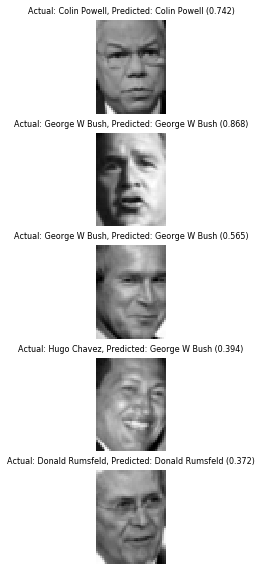

In [55]:
pca, scaler, model = load_model()

test_images = X_test[-5:] # last 5 test images
test_targets = y_test[-5:]

predictions, probs = get_predictions(pca, scaler, gs, test_images)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 10))
axes = axes.flatten()

for i in range(len(test_targets)):
    axes[i].imshow(test_images[i].reshape(height, width), cmap=plt.cm.gray)

    actual = test_targets[i]
    predicted = predictions[i]
    prob = probs[i][predicted] # probability for the predicted label
    
    axes[i].set_title('Actual: %s, Predicted: %s (%.3f)' % (lfw.target_names[actual], lfw.target_names[predicted], prob), size=8)
    axes[i].axis('off')

plt.show()